# Breast Cancer Dataset
### Problem Statement
Breast cancer is the second most frequent cancer in women and men globally. In 2012, it factored about 12 percent of all latest cancer cases and 25 percent of women’s total cancers.

Breast cancer arises when cells in the breast start to develop out of control. These cells usually grow a tumor that can frequently be seen on an x-ray or considered a lump. The tumor is malignant (cancer) if the cells can expand into (invade) encompassing tissues or increase (metastasize) to different sections of the body.

Dataset: https://www.kaggle.com/uciml/breast-cancer-wisconsin-data

After downloading the dataset, we will import the important libraries that are required for the further process.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc,confusion_matrix, classification_report,accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import time
pd.set_option('display.max_columns', 500) 

## Now we load our dataset using pandas

In [2]:
breast_cancer= pd.read_csv('data.csv')
breast_cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
# Making copy of dataset and stored in df 
df=breast_cancer.copy()

### Data Pre-processing

In [4]:
# id column is, generally the id of individual person and its a unique no, so we will set id as index
df.set_index('id', inplace=True)
#lets see the first 5 rows to verify it
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
# Lets check the dahpe of data
df.shape

(569, 31)

In [6]:
#Checking Null and Missing Values
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [7]:
# Lets look at the datatype of each features 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 842302 to 92751
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se            

**After checking various aspects like null values count, missing values count, and info. This dataset is perfect because of no Nul and missing values.**

In [8]:
# Converted to binary to help later on with models and plots
#Mapping ['Benign', 'Malignant'] 
df['diagnosis']= df['diagnosis'].map({'M':1,'B':0})


### In this dataset, our Target variable is  the ‘diagnosis’ feature column, so we check the value count of that column using pandas:

In [9]:
# counting values of variables in 'diagnosis'
df['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

C:\Users\Rohit Kumar (Prince)\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


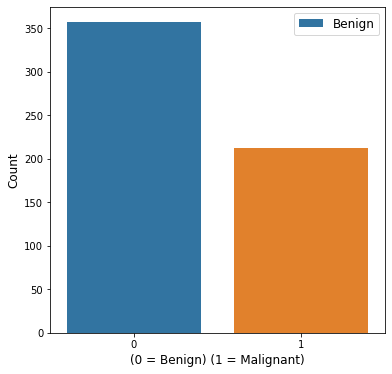

In [10]:
#Plottting the target variables 
plt.figure(figsize=(6,6))
sns.countplot(df['diagnosis'])
plt.xlabel("(0 = Benign) (1 = Malignant)", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend(["Benign"], fontsize=12)

**We have 357 malignant cases and 212 benign cases so our dataset is slightly Imbalanced data, we we can use various re-sampling algorithms like under-sampling, over-sampling, SMOTE, etc. to make it balanced data, But i am not using any these technique for now.**

### Independent and Dependent Variables
Now it’s time for dividing the dataset into independent and dependent variables, for that we create two variables one represents independent and the other represents dependent.

In [11]:
# Independent features, and storing data in X
X= df.drop(['diagnosis'],axis=1)  ## Axis=1-->dropping columns, Axis=0--> Dropping rows
# Dependnet features
y=df['diagnosis']

# Let's see the first 5 rows of independen features 
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [12]:
# Let's see the first five rows of dependent/Target features 
y.head()

id
842302      1
842517      1
84300903    1
84348301    1
84358402    1
Name: diagnosis, dtype: int64

### Splitting Data
Now its time for splitting the data into training and testing parts:

In [13]:
# Splitting the training and test data into 80:20 ratio
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

### Fitting the Random Forest Model

Now, let's create the model, starting with parameter tuning. Here are the parameters we will be tuning in this tutorial: 

- **max_depth**: The maximum splits for all trees in the forest.
- bootstrap: An indicator of whether or not we want to use bootstrap samples when building trees.
- **max_features**: The maximum number of features that will be used in node splitting — the main - difference I previously mentioned between bagging trees and random forest. Typically, you want a value that is less than p, where p is all features in your data set.
     - None: It will takes all the features, m=p=30 (m= No. of features in each DT and P=30)
     - log2: it will take log2(p), m=log2(30)
     - sqrt: it will take sqrt(p), m=sqrt(30)
     - auto: it will take sqrt of features, m=sqrt(30)

- **criterion**: This is the metric used to asses the stopping criteria for the decision trees.

In [14]:
# Initilizing the RandomForestClassifier
clf_rf= RandomForestClassifier(random_state=42)

### Hyperparameters Optimization
Utilizing the `GridSearchCV` functionality, let's create a dictionary with parameters we are looking to optimize to create the best model for our data. Setting the `n_jobs` to 3 tells the grid search to run three jobs in parallel, reducing the time the function will take to compute the best parameters. Have included the timer to see how long different jobs took; 
that led me to ultimately decide to use three parallel jobs.
This will help set the parameters we will use to tune one final parameter: the number of trees in our forest

`GridSearchCV`runs through all the different parameters that is fed into the parameter grid and produces the best combination of parameters.
- fatser Than RandomSearchCv
- It will gives us best parameter within the grid

In [15]:
np.random.seed(42)
start = time.time()


In [16]:
# Hyperparameter 
param_dist=  {'max_depth': [2, 3, 4],
              'bootstrap': [True, False],
              'max_features': ['auto', 'sqrt', 'log2', None],
              'criterion': ['gini', 'entropy']
}

In [17]:
# fitting the hyperparameter in GridsearchCv
# Cross_validation=10
optimal_param = GridSearchCV(estimator=clf_rf,param_grid=param_dist,n_jobs=3, cv=10)

# fitting the optimal_params
optimal_param.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42), n_jobs=3,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4],
                         'max_features': ['auto', 'sqrt', 'log2', None]})

### Getting the Best Hyperparameters
This will give the combination of hyperparameters along with values that give the best performance of our estimate specified.



In [18]:
# Getting the optimal parameters
optimal_param.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 4,
 'max_features': 'log2'}

In [19]:
# Set best parameters given by grid search 
clf_rf.set_params(criterion = 'entropy',
                  max_features = 'log2', 
                  max_depth = 4)

RandomForestClassifier(criterion='entropy', max_depth=4, max_features='log2',
                       random_state=42)

Notice how we didn't utilize the `bootstrap: True` parameter, this will make sense in the following section.

### Out of Error Bag Rate

Another useful feature of random forest is the concept of an out-of-bag (OOB) error rate. Because only two-thirds of the data are used to train each tree when building the forest, one-third of unseen data can be used in a way that is advantageous to our accuracy metrics without being as computationally expensive as something like cross validation, for instance.

As outlined below, when calculating OOB, two parameters have to be changed. Also, by utilizing a `for-loop` across a multitude of forest sizes, we can calculate the OOB error rate and use it to asses how many trees are appropriate for our model!

**NOTE**: When calculating the oob score, setting `bootstrap=True` will produce errors,

In [20]:

clf_rf.set_params(warm_start=True,oob_score=True)

#setting no of trees in forest
min_estimators=15
max_estimators=1000

# Here we will try to find the optimal trees in forest 

In [21]:
error_rate = {}

for i in range(min_estimators, max_estimators + 1):
    clf_rf.set_params(n_estimators=i)
    clf_rf.fit(X_train,y_train)

    oob_error = 1 - clf_rf.oob_score_
    error_rate[i] = oob_error

Text(0.5, 1.0, 'OOB Error Rate Across various Forest sizes \n(From 15 to 1000 trees)')

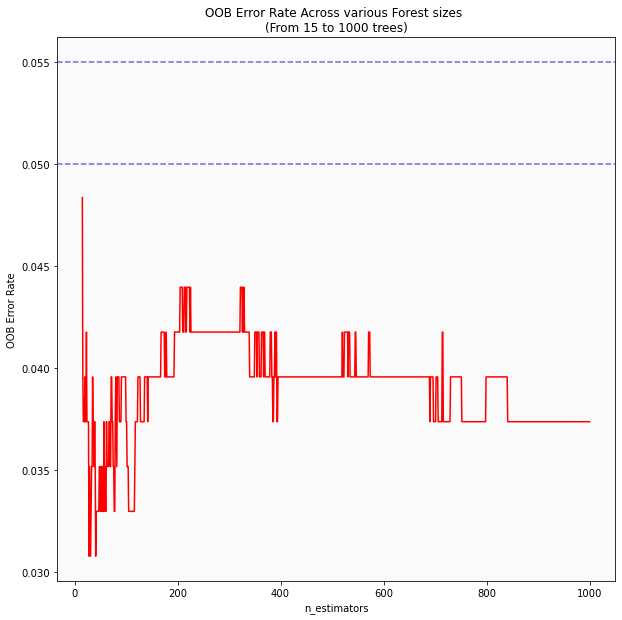

In [22]:
# Convert dictionary to a pandas series for easy plotting 
oob_series = pd.Series(error_rate)


fig, ax = plt.subplots(figsize=(10, 10))

ax.set_facecolor('#fafafa')

oob_series.plot(kind='line',
                color = 'red')
plt.axhline(0.055, 
            color='#875FDB',
           linestyle='--')
plt.axhline(0.05, 
            color='#875FDB',
           linestyle='--')
plt.xlabel('n_estimators')
plt.ylabel('OOB Error Rate')
plt.title('OOB Error Rate Across various Forest sizes \n(From 15 to 1000 trees)')

**The OOB error rate starts to oscilate at around 400 trees, so I will go ahead and use my judgement to use 400 trees in my forest.**

Using the `pandas` series object I can easily find the OOB error rate for the estimator as follows:

In [23]:
print('OOB Error rate for 400 trees is: {0:.5f}'.format(oob_series[400]))

OOB Error rate for 400 trees is: 0.03956


In [24]:
#Traditional Training and Test Set Split

clf_rf.set_params(n_estimators=400,
                  bootstrap = True,
                  warm_start=False, 
                  oob_score=False)

RandomForestClassifier(criterion='entropy', max_depth=4, max_features='log2',
                       n_estimators=400, random_state=42)

In [25]:
# fitting the model
clf_rf.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=4, max_features='log2',
                       n_estimators=400, random_state=42)

### Predicting the final model

In [26]:
y_pred= clf_rf.predict(X_test)

In [27]:
# Let's look at the prediction
y_pred

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1], dtype=int64)

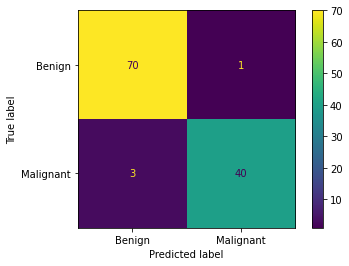

In [28]:
# Let's see the confusion metrix
from sklearn.metrics import plot_confusion_matrix,accuracy_score
plot_confusion_matrix(clf_rf,X_test,y_test,values_format='d',display_labels=['Benign', 'Malignant'])

In [29]:
# Evaluating the final model
print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))

0.9649122807017544
              precision    recall  f1-score   support

           0       0.99      0.96      0.97        73
           1       0.93      0.98      0.95        41

    accuracy                           0.96       114
   macro avg       0.96      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114



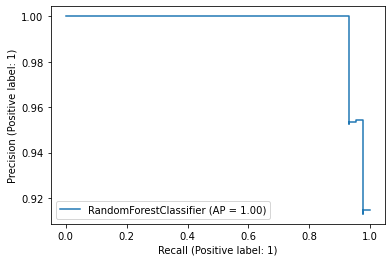

In [32]:
from sklearn.metrics import plot_precision_recall_curve
plot_precision_recall_curve(clf_rf,X_test,y_test)

### Conclusion
In this notebook, i tries to expalin the hyperparameter optimization and out of error bag rate (OOB).
We have build the Random forest machine learning model and used GridsearchCV to choose the best parameter for the final model.   